In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("World Happiness Report.csv")

data.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe


In [21]:
data.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,151.000000
mean,78.169935,5.349281,0.982433,1.186630,0.550117,0.408489,0.245324,0.123179,1.853072,75.209934
std,45.008741,1.134997,0.421901,0.288441,0.237769,0.150744,0.134395,0.102133,0.499490,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,40.000000,4.497000,0.659517,1.041990,0.364509,0.300741,0.153075,0.057070,1.597970,68.950000
50%,78.000000,5.279000,1.064578,1.251826,0.606042,0.437454,0.231503,0.089848,1.832910,78.100000
75%,117.000000,6.098000,1.315175,1.416404,0.719217,0.518631,0.322228,0.153066,2.150801,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


In [23]:
data.isnull().sum()


Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

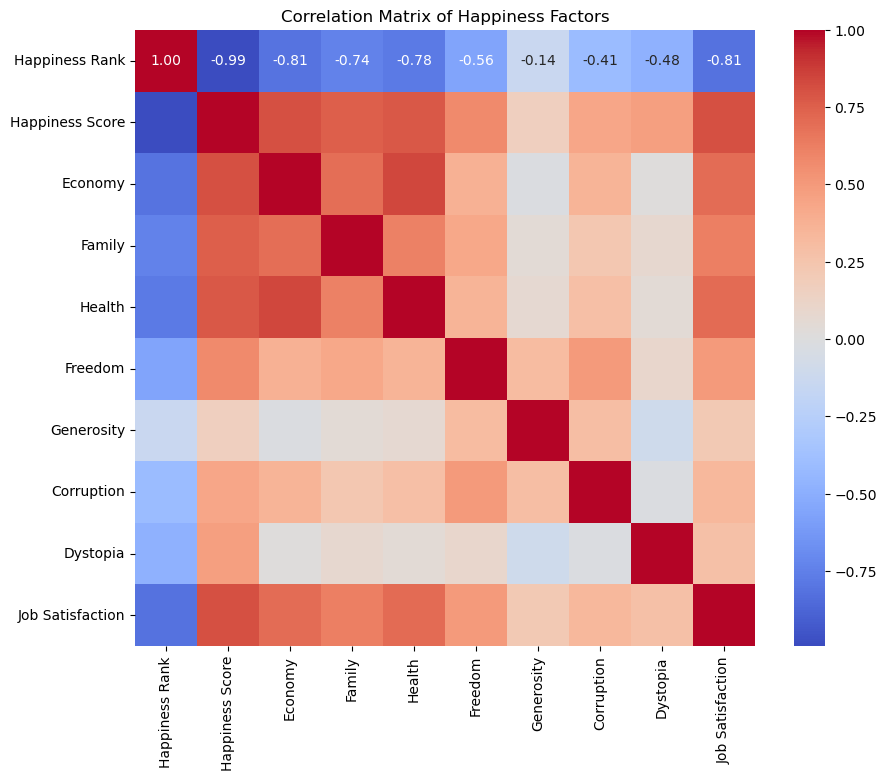

In [24]:
numeric_data = data.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Happiness Factors')
plt.show()




/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


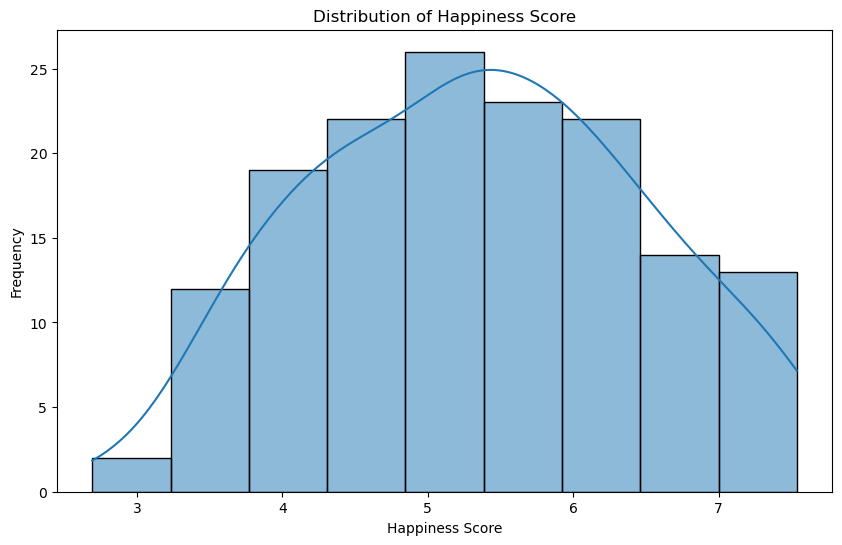

In [25]:
# Distribution of Happiness Score
plt.figure(figsize=(10, 6))
sns.histplot(data['Happiness Score'], kde=True)
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Score')
plt.show()


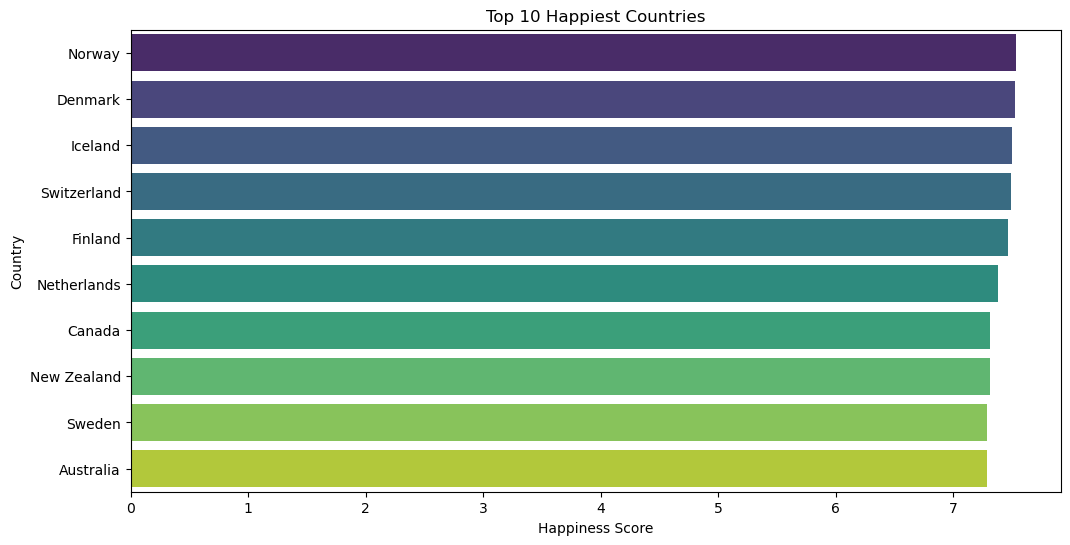

In [26]:
top_10_happiest = data.nlargest(10, 'Happiness Score')
plt.figure(figsize=(12, 6))
sns.barplot(x='Happiness Score', y='Country', data=top_10_happiest, palette='viridis')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 Happiest Countries')
plt.show()


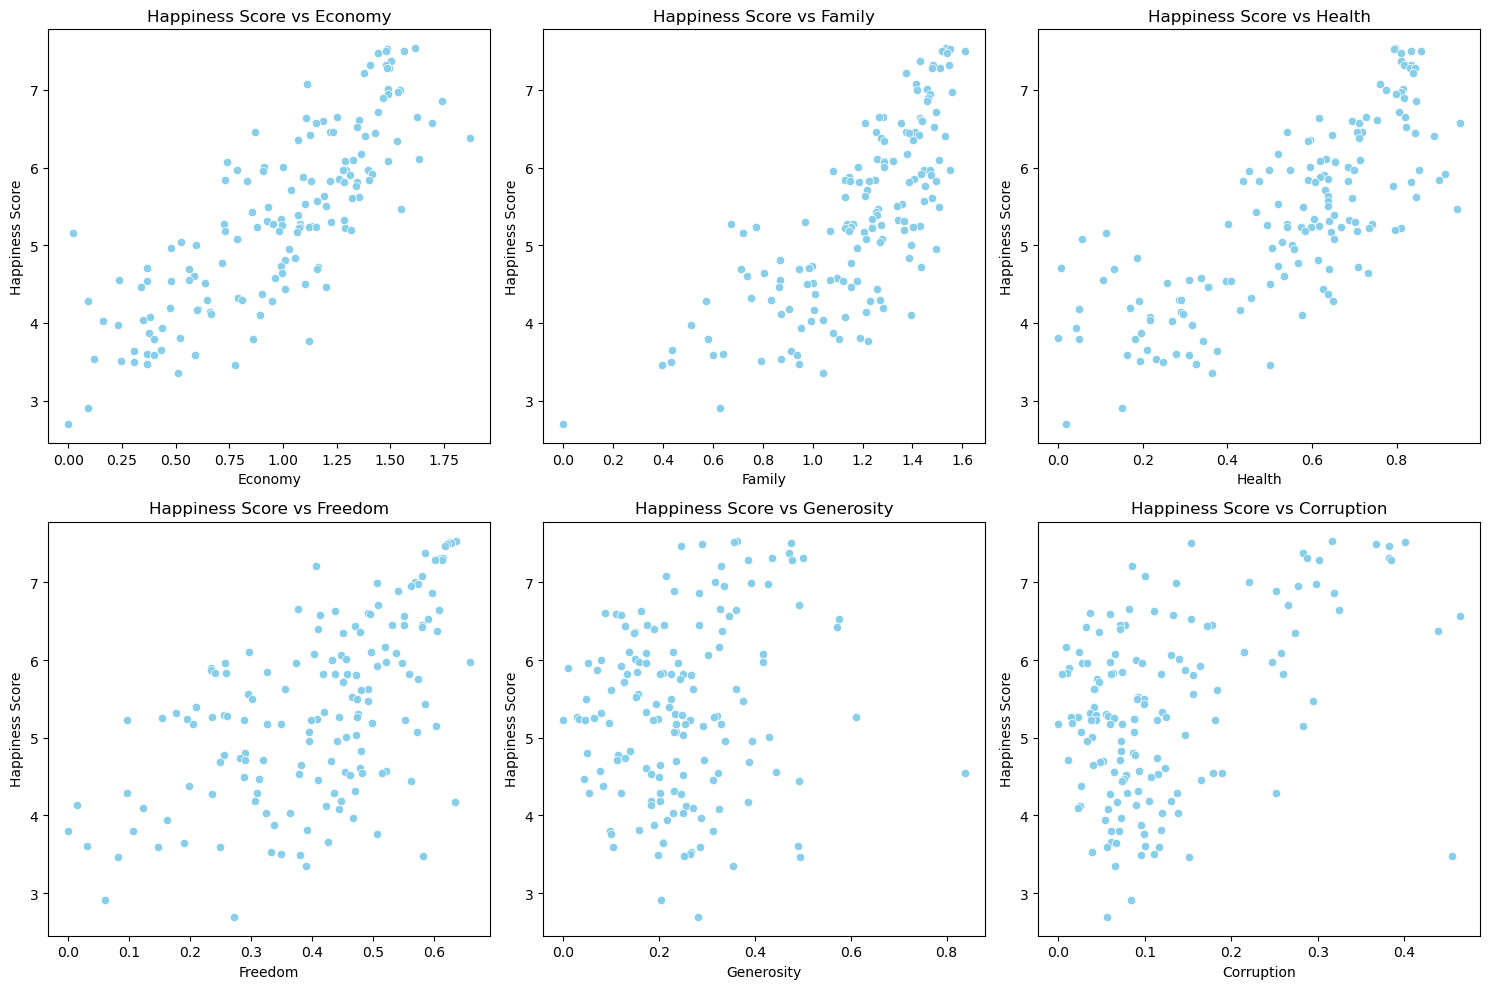

In [27]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Corruption']
plt.figure(figsize=(15, 10))
for i, factor in enumerate(factors, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=factor, y='Happiness Score', data=data, color='skyblue')
    plt.title(f'Happiness Score vs {factor}')
plt.tight_layout()
plt.show()



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


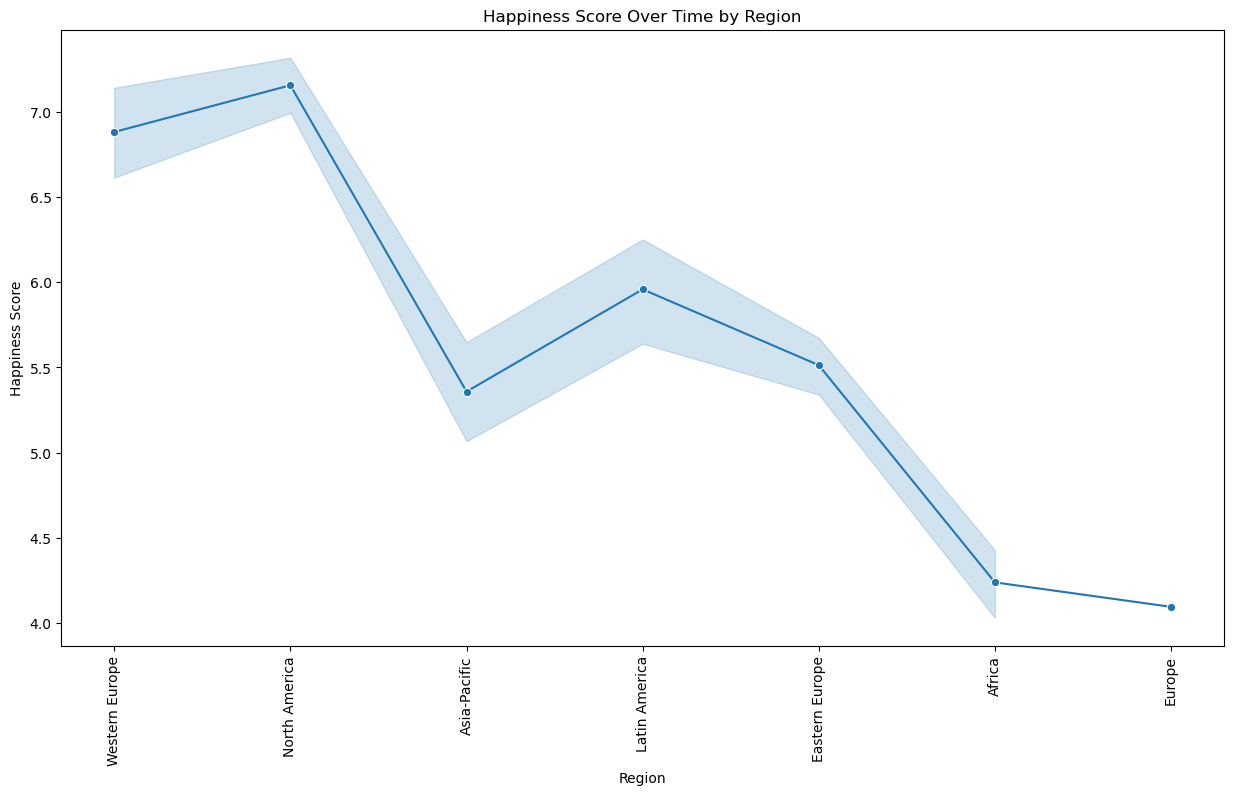

In [28]:
# Time series analysis of happiness score by region
plt.figure(figsize=(15, 8))
sns.lineplot(x='Region', y='Happiness Score', data=data, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.title('Happiness Score Over Time by Region')
plt.show()







In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data[['Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Corruption']]
y = data['Happiness Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Regression Coefficients:")
print(coefficients)


Mean Squared Error: 0.20846466303325395
Regression Coefficients:
            Coefficient
Economy        0.813123
Family         1.216247
Health         1.097327
Freedom        1.527688
Generosity     0.390240
Corruption     0.910246


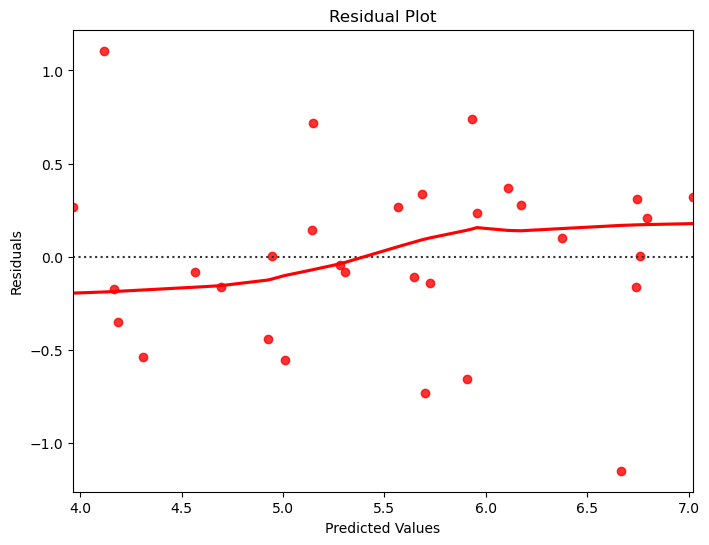

In [30]:
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=y_test-y_pred, lowess=True, color='r')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


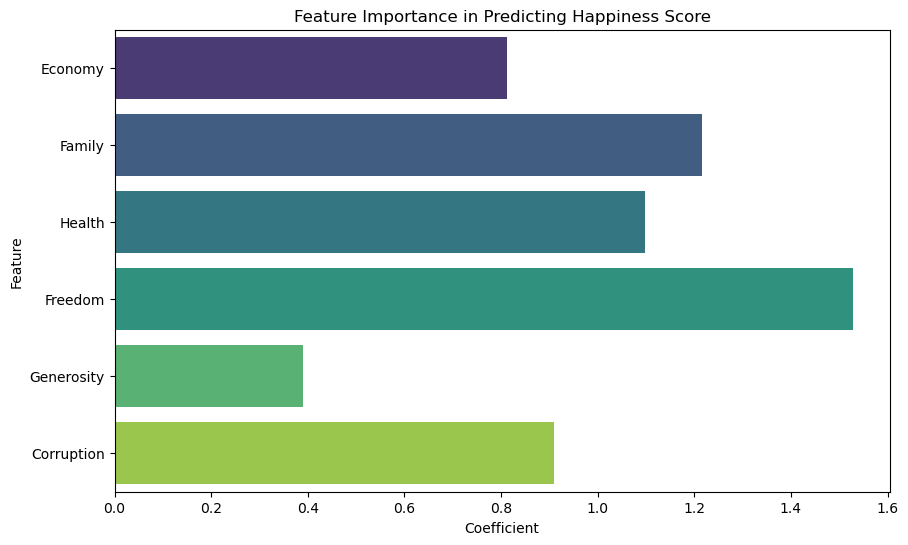

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model.coef_, y=X.columns, palette='viridis')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Happiness Score')
plt.show()


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

data = pd.read_csv("World Happiness report.csv")

data.head()




,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


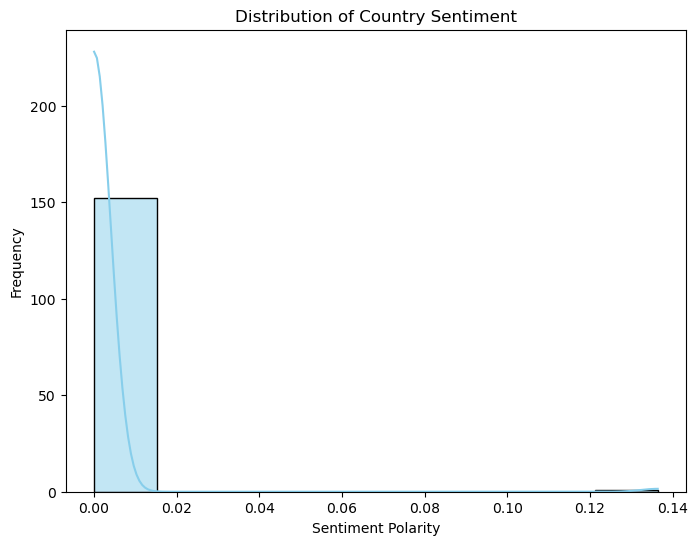

In [9]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

data['Country_Sentiment'] = data['Country'].apply(get_sentiment)

plt.figure(figsize=(8, 6))
sns.histplot(data['Country_Sentiment'], kde=True, color='skyblue')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Country Sentiment')
plt.show()


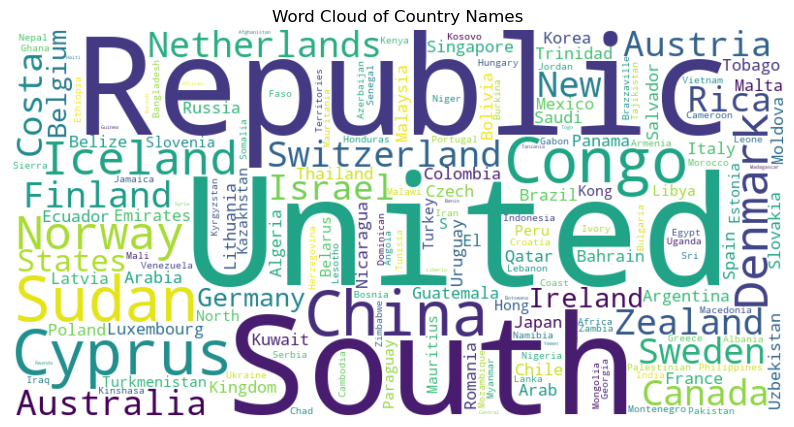

In [13]:
# Word cloud of country names
from wordcloud import WordCloud

text = ' '.join(data['Country'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Country Names')
plt.show()


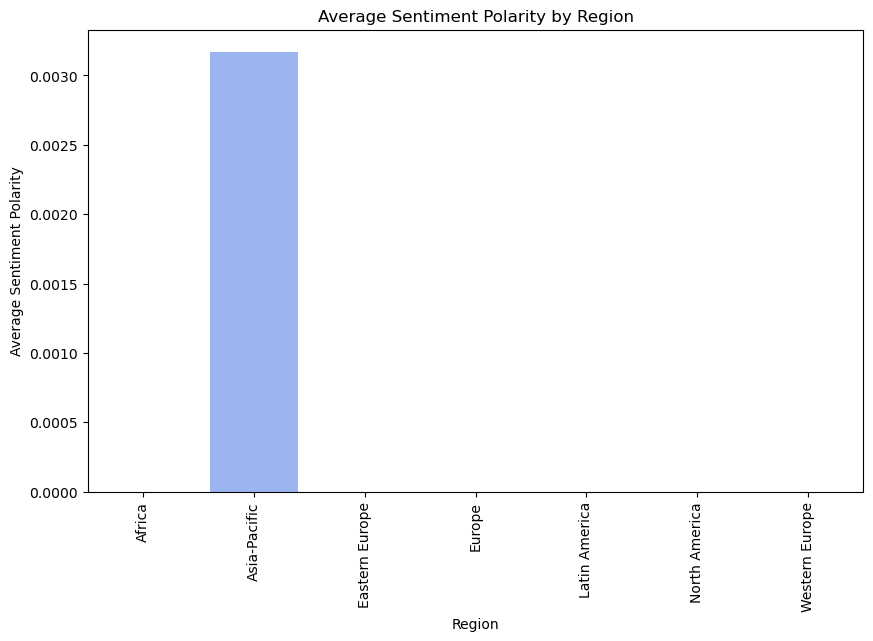

In [15]:
# Sentiment analysis of country names by region
region_sentiment = data.groupby('Region')['Country_Sentiment'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Country_Sentiment', data=region_sentiment, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Sentiment Polarity')
plt.title('Average Sentiment Polarity by Region')
plt.show()



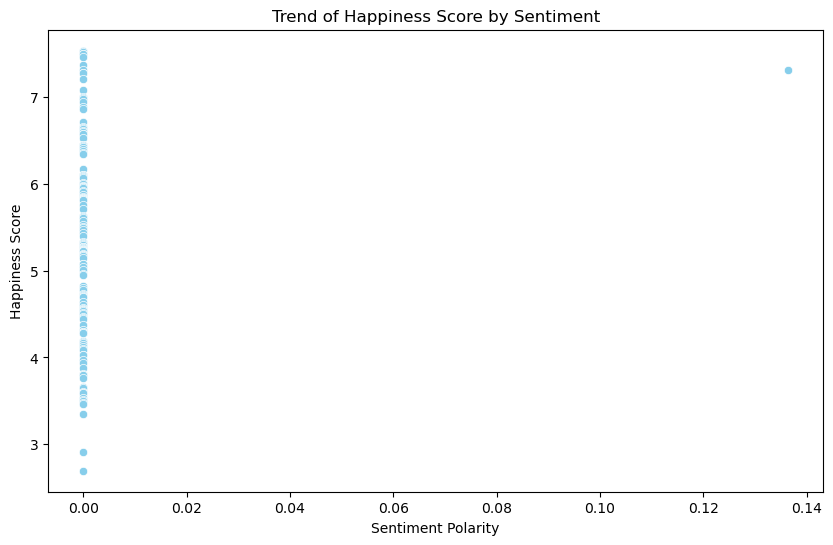

In [16]:
# Trend of happiness score by sentiment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Country_Sentiment', y='Happiness Score', data=data, color='skyblue')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Happiness Score')
plt.title('Trend of Happiness Score by Sentiment')
plt.show()


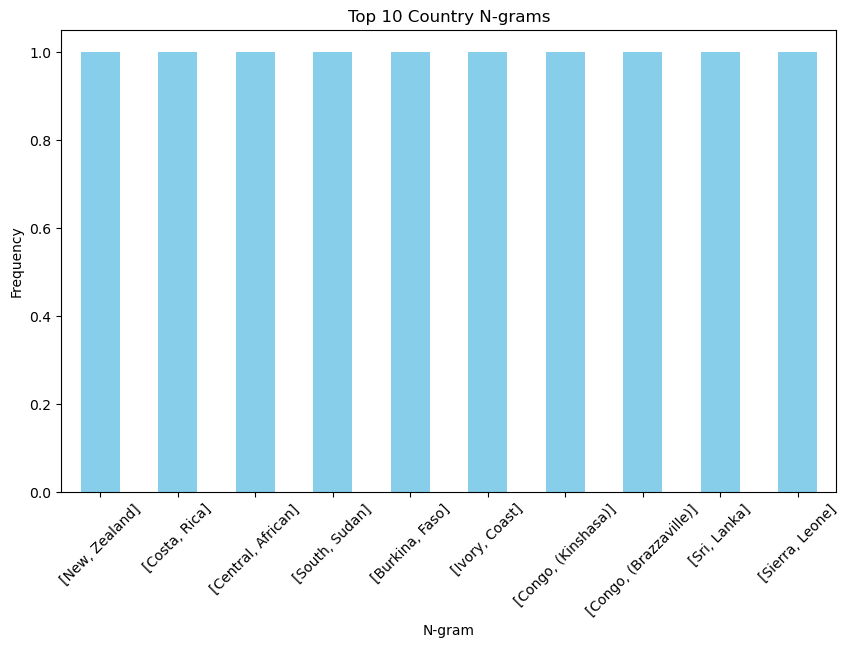

In [19]:
# N-gram analysis of country names
def generate_ngrams(text, n):
    words = text.split()
    ngrams = [words[i:i+n] for i in range(len(words)-n+1)]
    return ngrams

data['Country_Ngrams'] = data['Country'].apply(lambda x: generate_ngrams(x, 2))

# Flatten the list of ngrams
ngrams_list = [item for sublist in data['Country_Ngrams'] for item in sublist]

# Get the frequency of ngrams
ngrams_freq = pd.Series(ngrams_list).value_counts().head(10)

plt.figure(figsize=(10, 6))
ngrams_freq.plot(kind='bar', color='skyblue')
plt.xlabel('N-gram')
plt.ylabel('Frequency')
plt.title('Top 10 Country N-grams')
plt.xticks(rotation=45)
plt.show()
